In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
mall_df= pd.read_csv('Mall_Customers.csv')

In [3]:
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
mall_df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
mall_df.shape

(200, 5)

In [6]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
mall_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
mall_df.drop(["CustomerID"], axis = 1, inplace=True)
mall_df.columns = ["gender","age","income","spending"]

In [10]:
mall_df.head()

,gender,age,income,spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Data Visualization


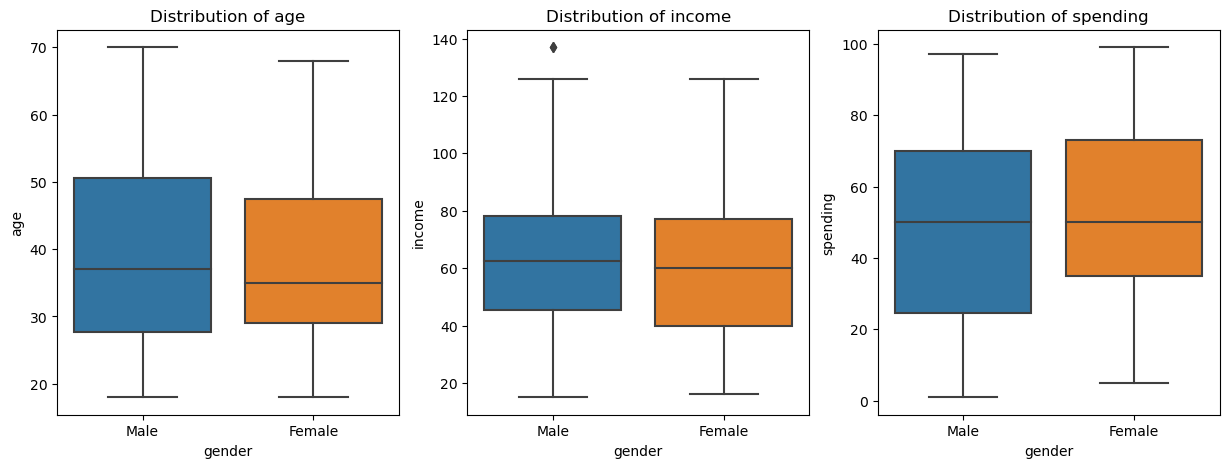

In [11]:
plt.figure(figsize = (15,5))
n = 0
for i in ["age","income","spending"]:
    n +=1
    plt.subplot(1,3,n)
    sns.boxplot(x = mall_df.gender, y  =mall_df[i])
    plt.title("Distribution of {}".format(i))
plt.show()

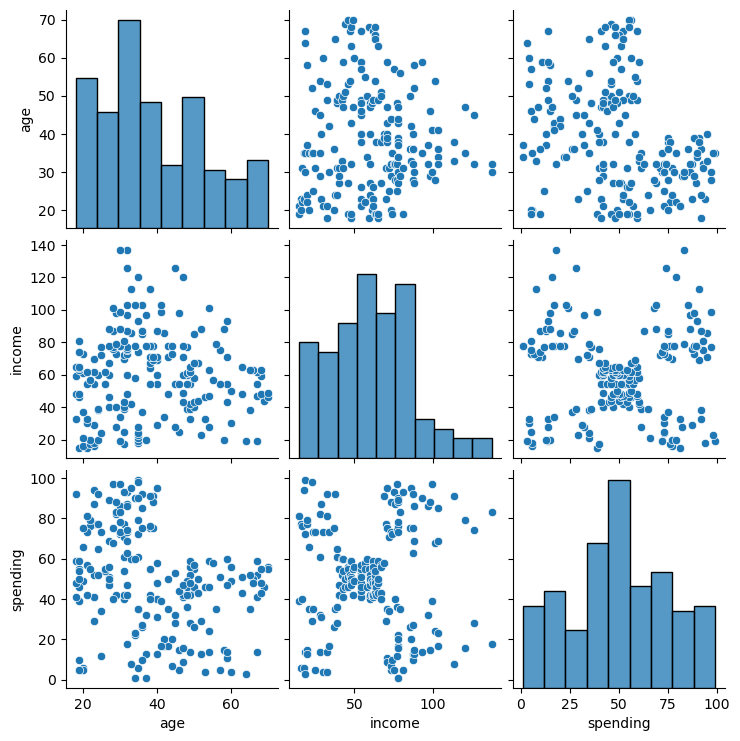

In [12]:
# lets get the pairplot for the data
sns.pairplot(mall_df)
plt.show()

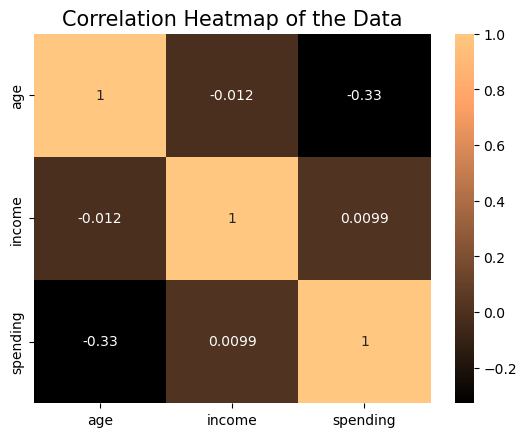

In [13]:
# lets check the Correlation Heat Map of the Data
sns.heatmap(mall_df.corr(), annot = True, cmap = 'copper')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

# Counting Gender

Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='spending', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=-3.45E-01'}, xlabel='age', ylabel='spending'>,
         <AxesSubplot:title={'center':'F=7.84E-03'}, xlabel='income'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=9.01E-02'}, xlabel='spending', ylabel='gender'>]],
       dtype=object)]

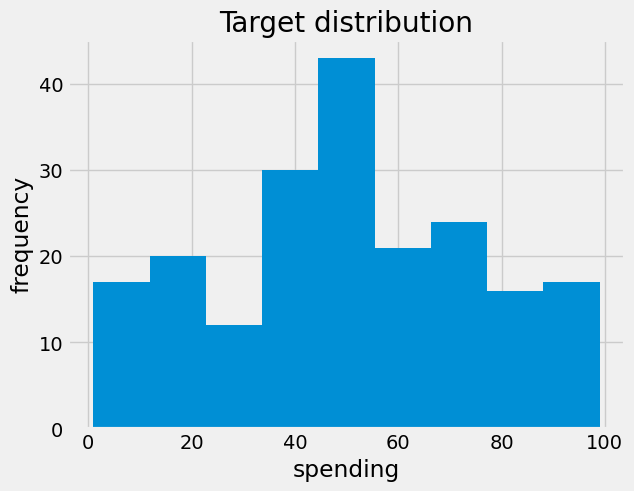

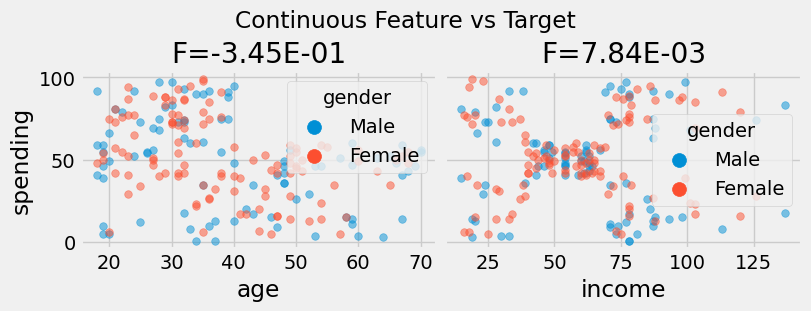

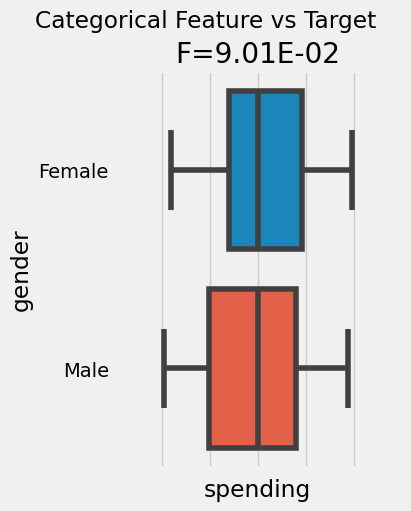

In [14]:
# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for data analysis
import dabl
# lets analyze the data with respect to Spending Score
dabl.plot(mall_df, target_col = 'spending')

Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='income', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=1.98E-02'}, xlabel='age', ylabel='income'>,
         <AxesSubplot:title={'center':'F=7.84E-03'}, xlabel='spending'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=1.53E-03'}, xlabel='income', ylabel='gender'>]],
       dtype=object)]

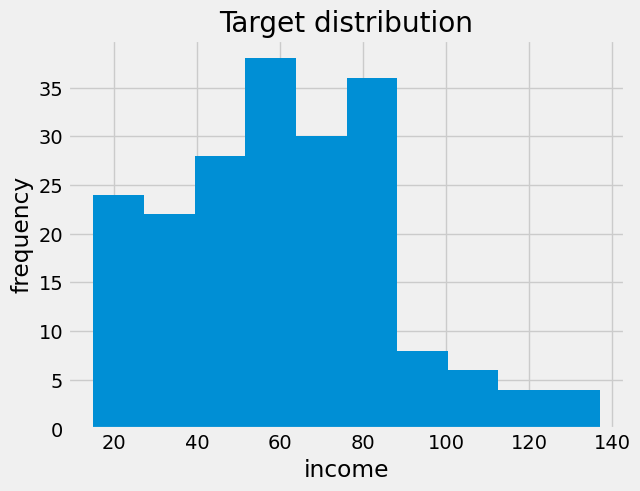

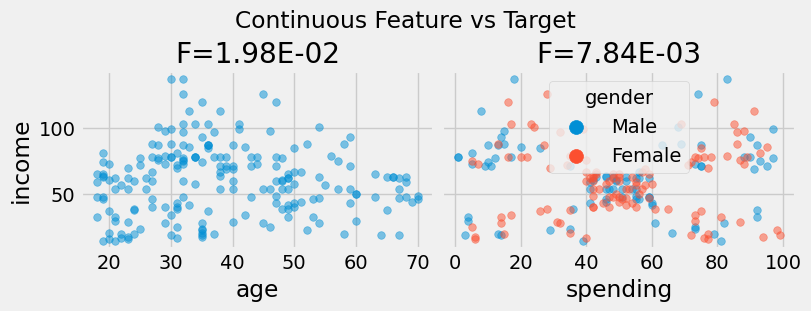

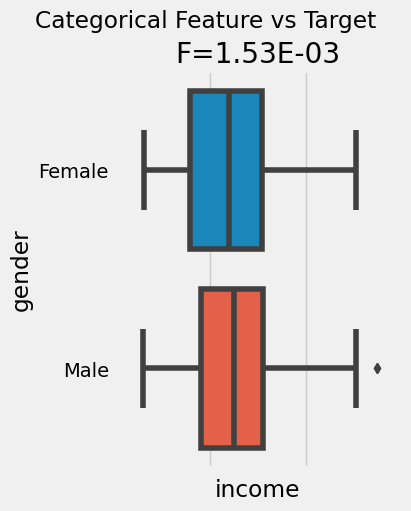

In [15]:
# lets analyze the data with respect to Annual Income
dabl.plot(mall_df, target_col = 'income')

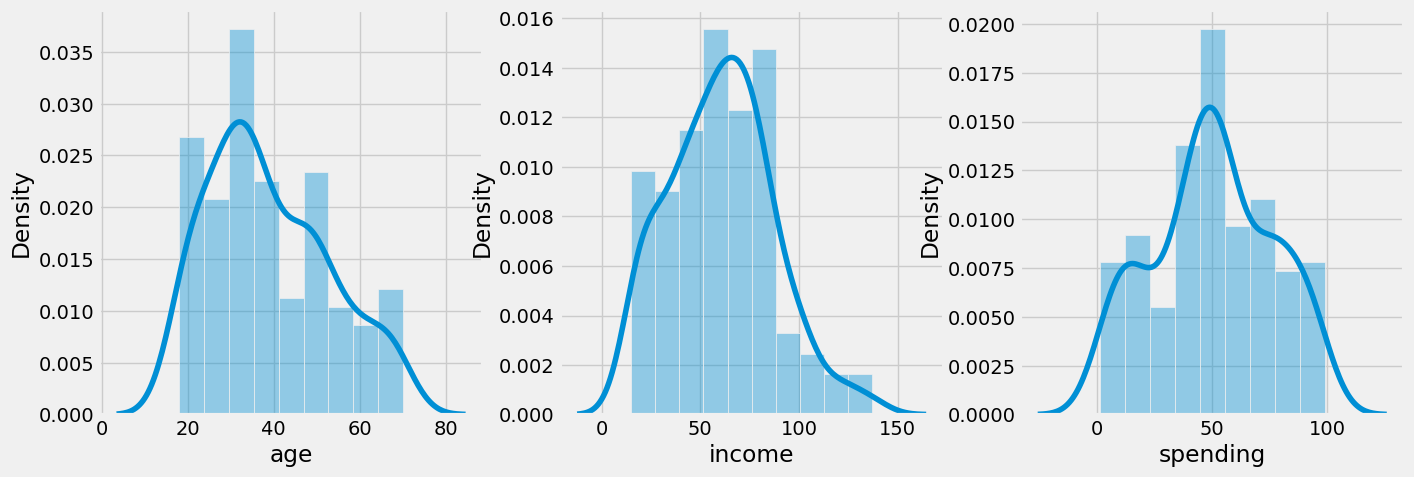

In [16]:
plt.figure(figsize = (15,5))
n = 0
for i in ["age","income","spending"]:
    n = n+1
    plt.subplot(1,3,n)
    sns.histplot(mall_df[i], kde= True,stat = "density",  kde_kws=dict(cut=3), alpha=.4)
    
plt.show()

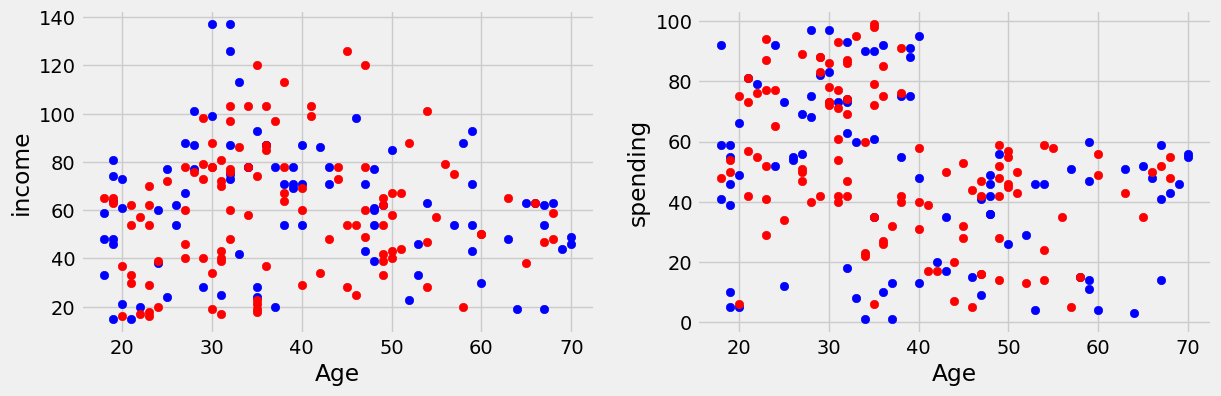

In [17]:
female = mall_df[mall_df.gender == "Female"]
male = mall_df[mall_df.gender == "Male"]

plt.figure(figsize = (13,4))
n = 0
for i in ["income","spending"]:
    n += 1
    plt.subplot(1,2,n)
    plt.scatter(male.age, male[i], color = "blue")
    plt.scatter(female.age, female[i], color = "red")
    plt.xlabel("Age")
    plt.ylabel(i)
plt.show()

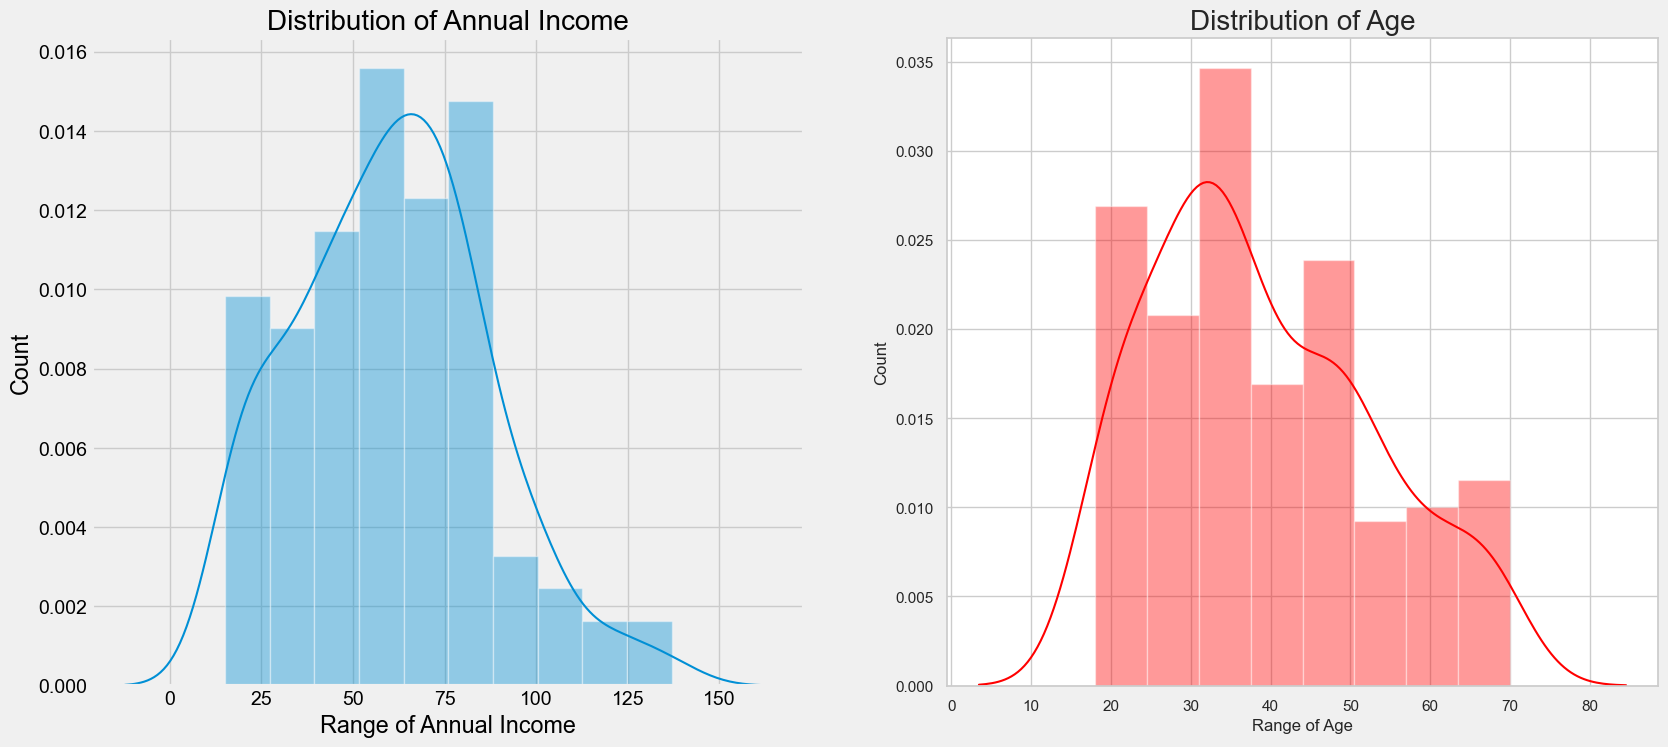

In [18]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(mall_df['income'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(mall_df['age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

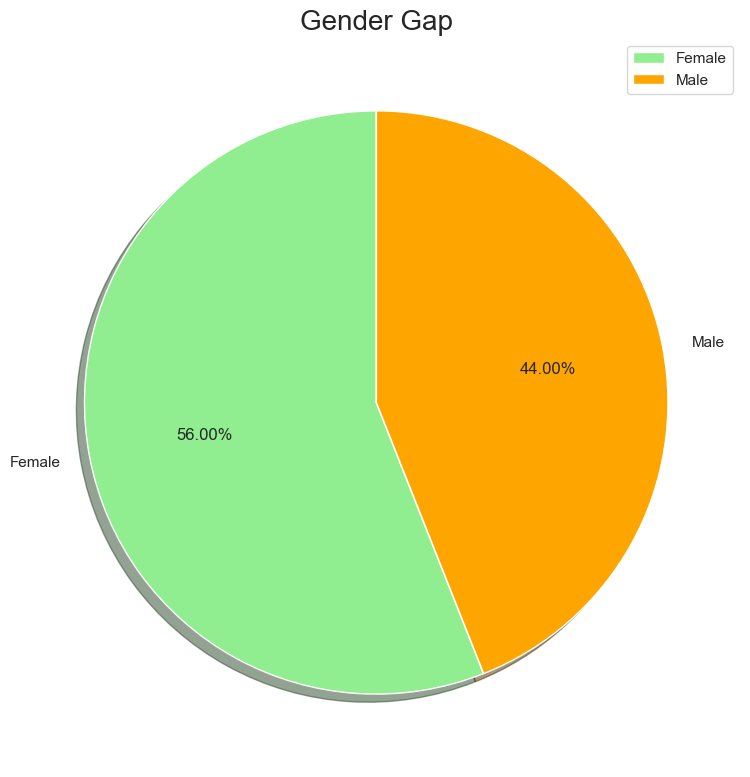

In [19]:
labels = ['Female', 'Male']
size = mall_df['gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

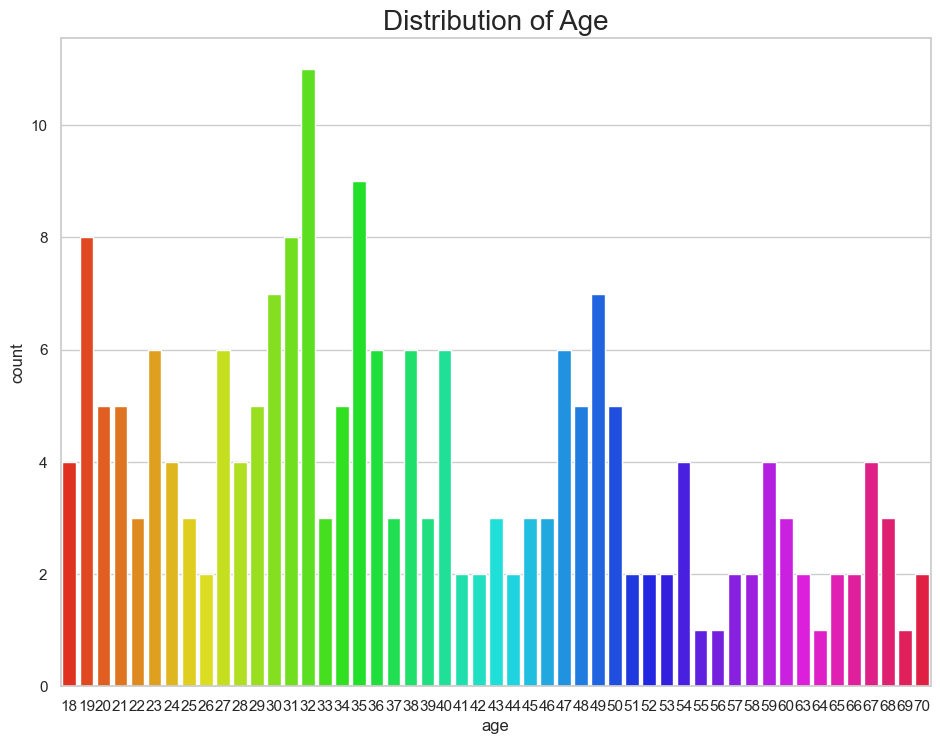

In [20]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.countplot(mall_df['age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

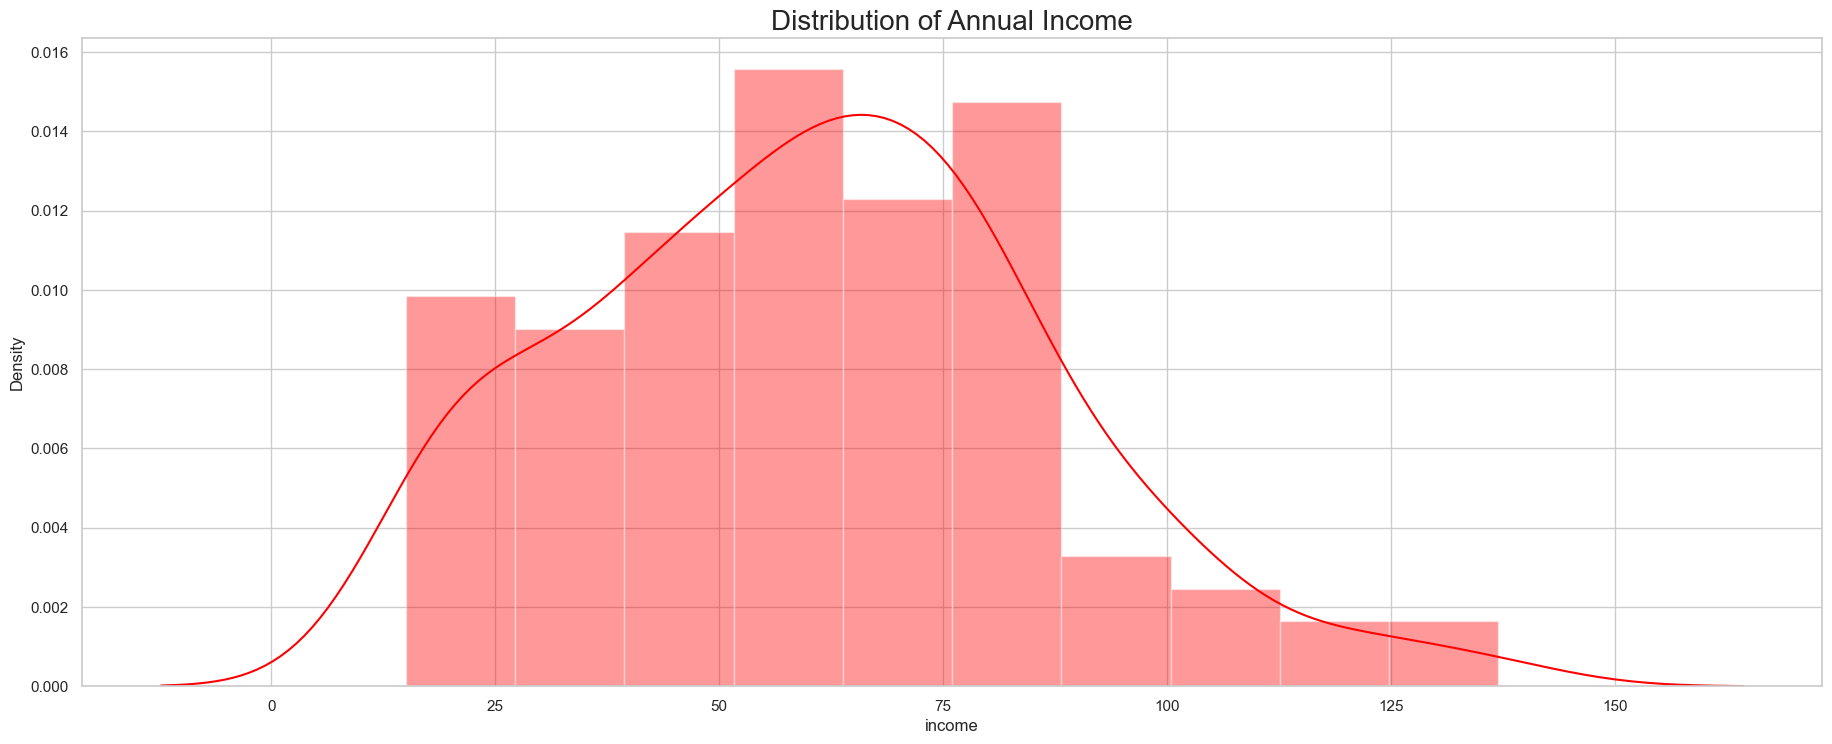

In [21]:
# lets check the distribution of Annual Income
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(mall_df['income'], color = 'red')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

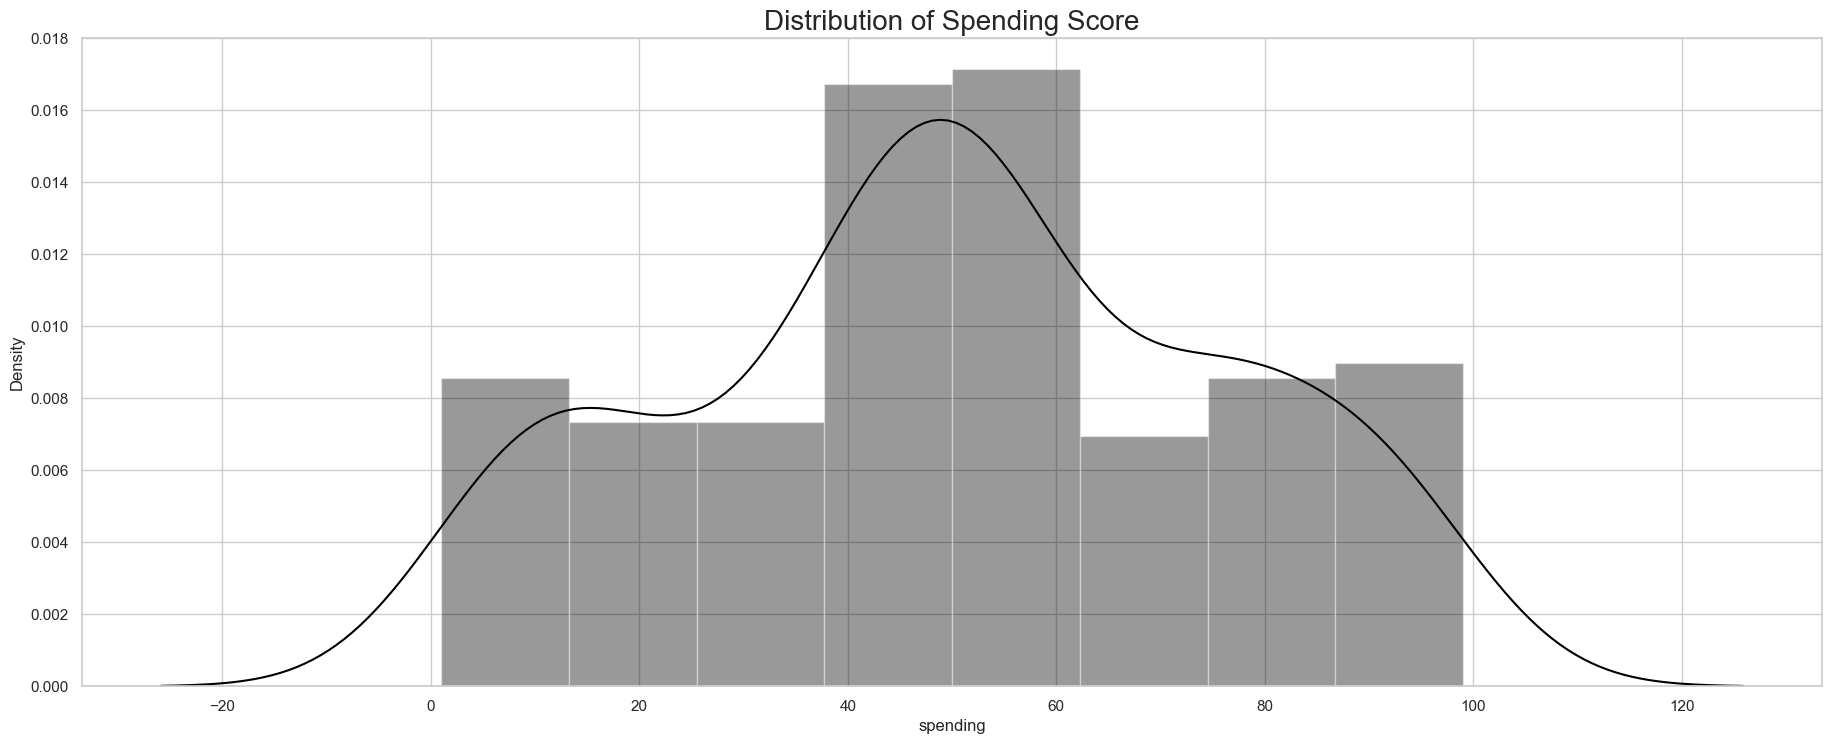

In [22]:
# lets check the distribution of Spending Score
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(mall_df['spending'], color = 'black')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

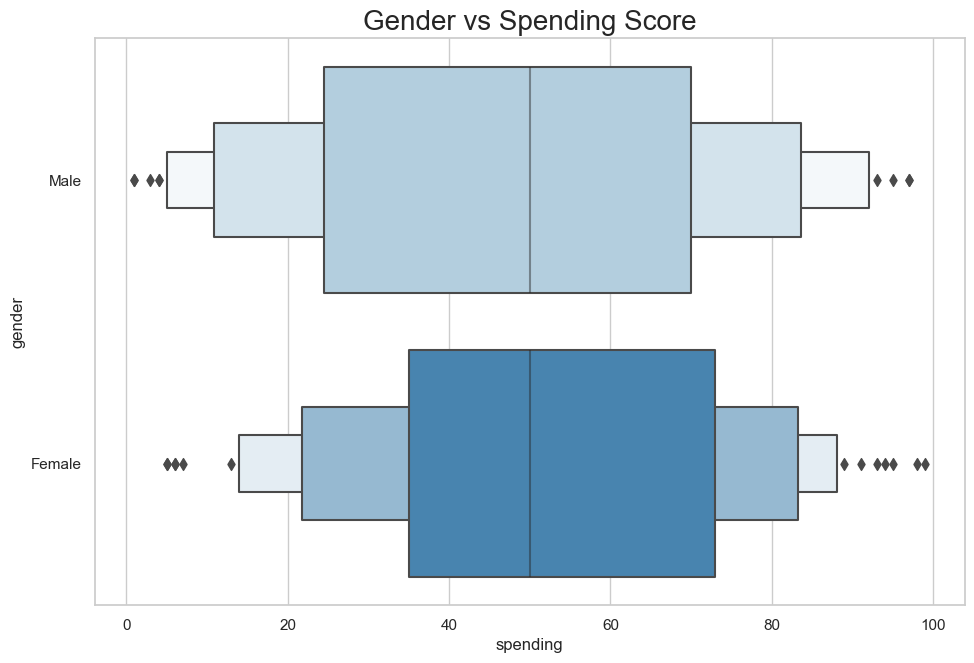

In [23]:
#  Gender vs Spendscore
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxenplot(mall_df['spending'], mall_df['gender'] ,palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

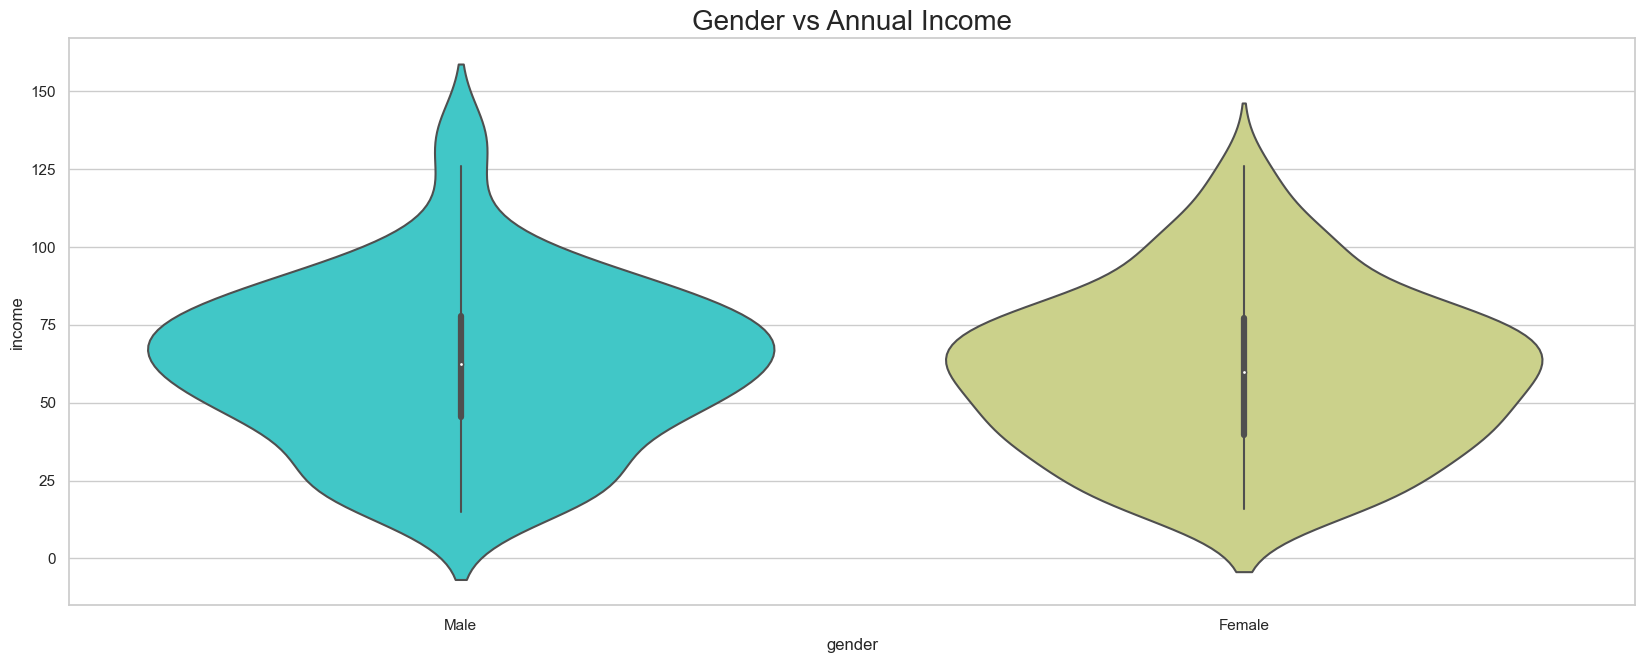

In [24]:
## Gender vs Annual Income

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(mall_df['gender'], mall_df['income'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

# Data Preperation

In [25]:
def convert_gender(gender):
    if gender == "Male":
        return 1
    if gender == "Female":
        return 0

mall_df["gender"] = mall_df["gender"].apply(convert_gender)

In [26]:
mall_df["gender"].unique()

array([1, 0])

In [27]:
mall_df.head()

,gender,age,income,spending
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


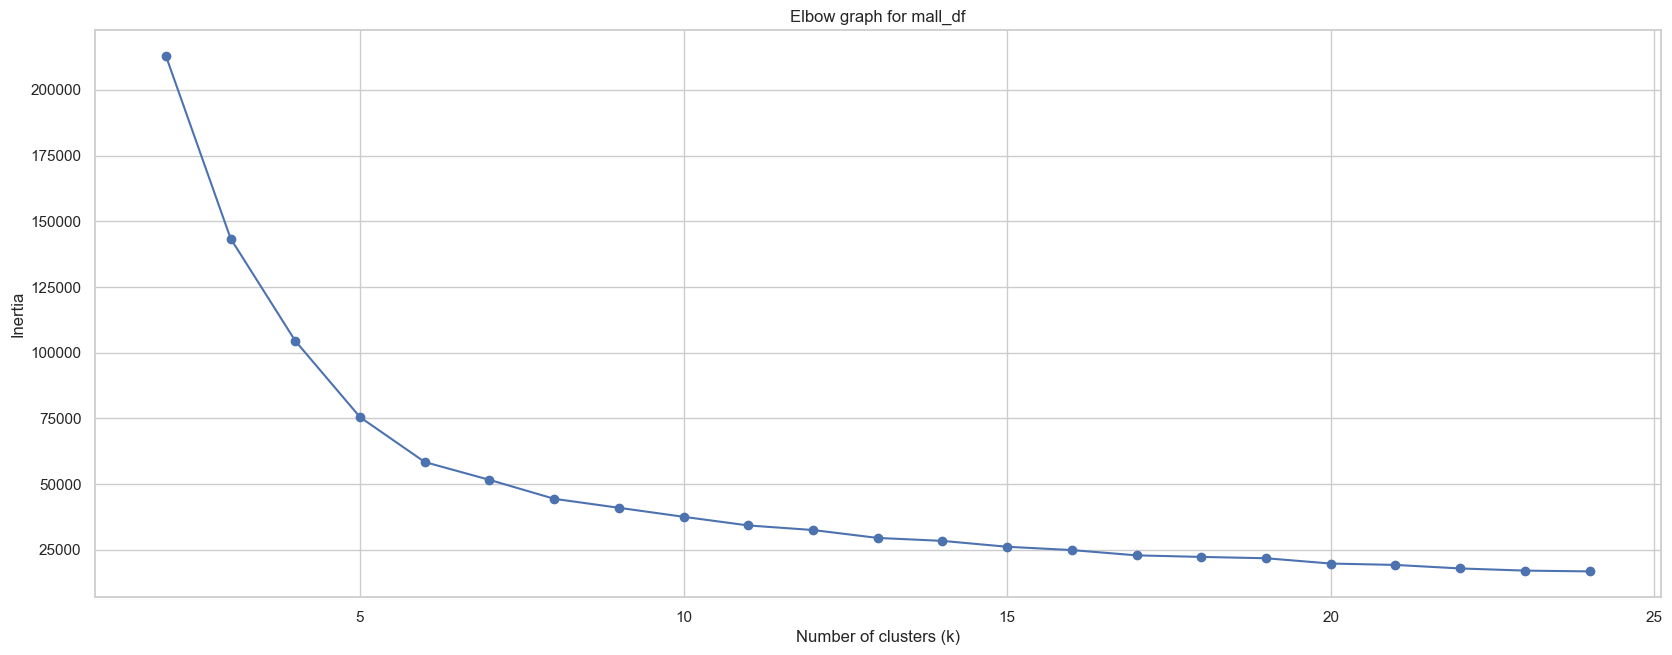

In [28]:
from sklearn.cluster import KMeans
inertias = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mall_df)
    inertias.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(2, 25), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow graph for mall_df')
plt.show()

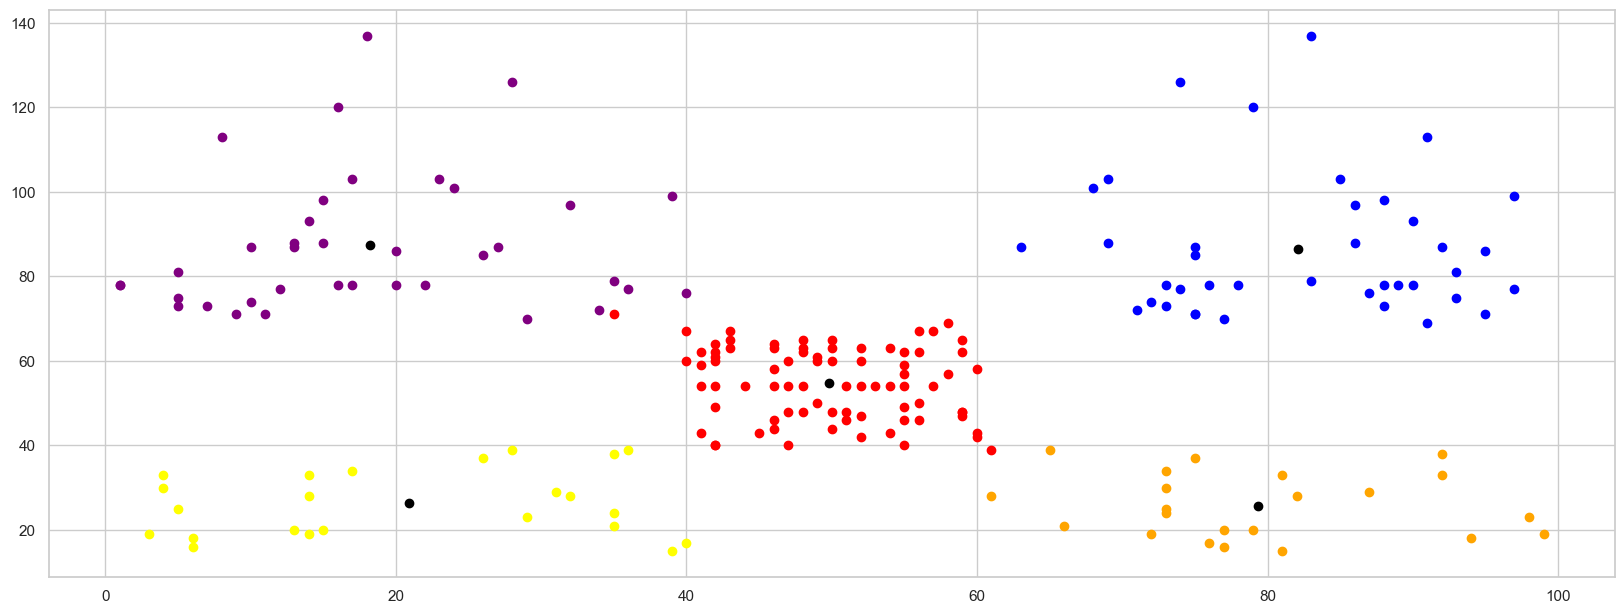

In [29]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=5) 

clusters = kmeans2.fit_predict(mall_df)

mall_df["label"] = clusters

plt.scatter(mall_df.spending[mall_df.label == 0], mall_df.income[mall_df.label == 0], color = "red")
plt.scatter(mall_df.spending[mall_df.label == 1], mall_df.income[mall_df.label == 1], color = "blue")
plt.scatter(mall_df.spending[mall_df.label == 2], mall_df.income[mall_df.label == 2], color = "purple")
plt.scatter(mall_df.spending[mall_df.label == 3], mall_df.income[mall_df.label == 3], color = "yellow")
plt.scatter(mall_df.spending[mall_df.label == 4], mall_df.income[mall_df.label == 4], color = "orange")
plt.scatter(kmeans2.cluster_centers_[:,3],kmeans2.cluster_centers_[:,2], color = "black")
plt.show()

In [30]:
mall_df.head()

,gender,age,income,spending,label
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


In [31]:
oneData = mall_df.loc[mall_df["label"] == 0, :]
twoData = mall_df.loc[mall_df["label"] == 1, :]
threeData = mall_df.loc[mall_df["label"] == 2, :]
fourData = mall_df.loc[mall_df["label"] == 3, :]
fiveData = mall_df.loc[mall_df["label"] == 4, :]

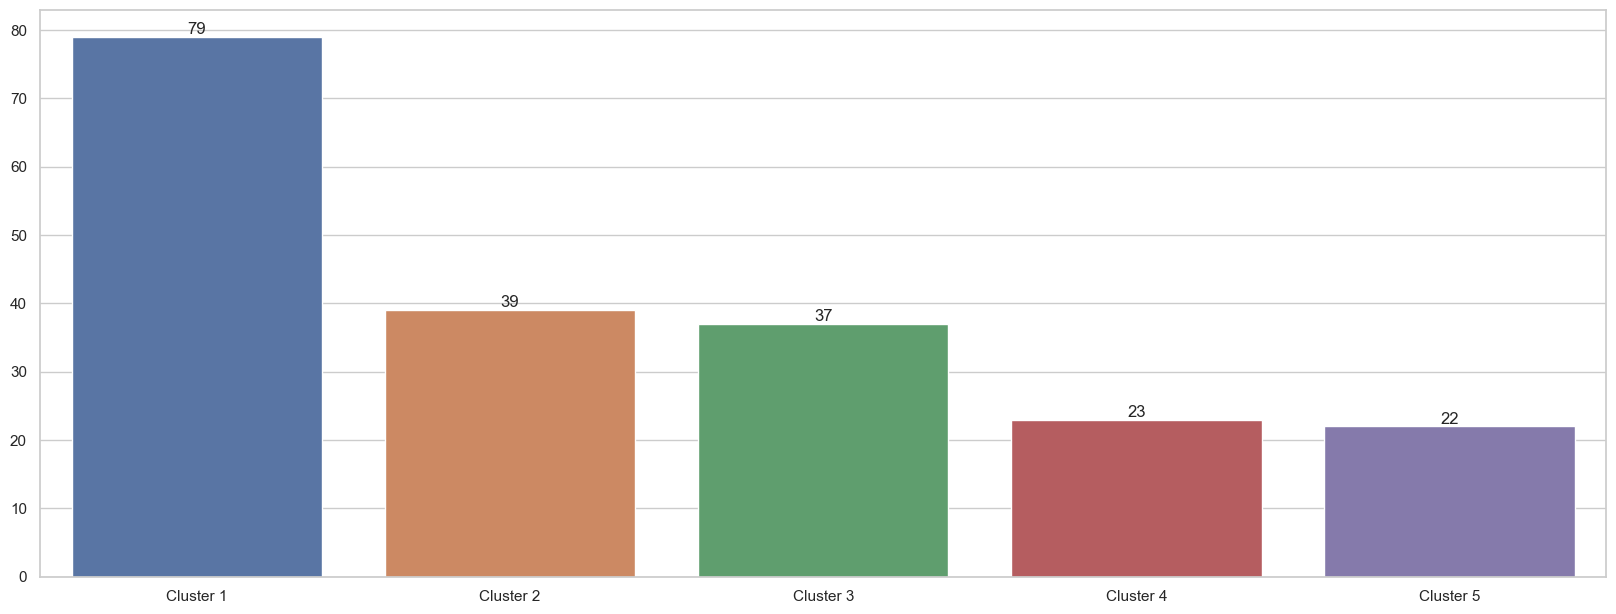

In [32]:
ax = sns.barplot(x = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                 y = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
ax.bar_label(container = ax.containers[0],labels = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
plt.show()

Cluster 1: Average Income, Average Spending Score

Cluster 2: High Income, Low Spending Score

Cluster 3: Low Income, Low Spending Score

Cluster 4: Low Income, High Spending Score

Cluster 5: High Income, High Spending Score

In [33]:
from sklearn.model_selection import train_test_split

predictors = mall_df.drop("label",axis=1)
target = mall_df["label"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=42, stratify=mall_df["label"])
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 160 records and Testing features have 40 records.


In [34]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [35]:
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 97.50%
n_neigbors = 2
Train accuracy: 97.50%
Test accuracy: 97.50%
n_neigbors = 3
Train accuracy: 98.12%
Test accuracy: 97.50%
n_neigbors = 4
Train accuracy: 96.25%
Test accuracy: 97.50%
n_neigbors = 5
Train accuracy: 98.12%
Test accuracy: 97.50%
n_neigbors = 6
Train accuracy: 96.88%
Test accuracy: 95.00%
n_neigbors = 7
Train accuracy: 96.88%
Test accuracy: 97.50%
n_neigbors = 8
Train accuracy: 96.25%
Test accuracy: 95.00%
n_neigbors = 9
Train accuracy: 96.88%
Test accuracy: 95.00%


In [36]:

knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=1)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 100.00%
Test accuracy: 97.50%
[0 0 2 1 0 3 0 4 1 0 4 4 0 3 0 1 2 0 0 4 1 2 2 3 1 2 2 0 2 0 1 1 0 0 0 0 0
 1 3 0]


In [37]:
from sklearn.metrics import accuracy_score
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 97.5 %


In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
matrix= confusion_matrix(Y_test, y_pred_knn)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_knn))
print("Accuracy:",accuracy_score(Y_test, y_pred_knn)*100)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         4

    accuracy                           0.97        40
   macro avg       0.99      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40

Accuracy: 97.5


In [41]:
import pickle
filename = 'trained_model.pkl'
pickle.dump(knn,open(filename,'wb'))

In [42]:
loaded_model = pickle.load(open('trained_model.pkl','rb'))

In [43]:
mall_df

,gender,age,income,spending,label
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


In [44]:
mall_df["label"].unique()

array([3, 4, 0, 1, 2], dtype=int32)

In [45]:
mall_df.loc[mall_df["label"]==0].head(5)

,gender,age,income,spending,label
43,0,31,39,61,0
46,0,50,40,55,0
47,0,27,40,47,0
48,0,29,40,42,0
49,0,31,40,42,0


In [54]:
input_data = (0,19,15,50)
#chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
pred = loaded_model.predict(input_data_reshaped)
print(pred)

[3]


In [47]:
mall_df.loc[mall_df["label"]==1].head(5)

,gender,age,income,spending,label
123,1,39,69,91,1
125,0,31,70,77,1
127,1,40,71,95,1
129,1,38,71,75,1
131,1,39,71,75,1


In [48]:
mall_df.loc[mall_df["label"]==2].head(5)

,gender,age,income,spending,label
124,0,23,70,29,2
128,1,59,71,11,2
130,1,47,71,9,2
132,0,25,72,34,2
134,1,20,73,5,2


In [49]:
input_data = (0,23,70,29)
#chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
pred = loaded_model.predict(input_data_reshaped)
print(pred)

[2]


In [2]:
mall_df.loc[mall_df["label"]==3].head()

SyntaxError: unmatched ']' (485429503.py, line 1)

In [51]:
mall_df.loc[mall_df["label"]==4].head(5)

,gender,age,income,spending,label
1,1,21,15,81,4
3,0,23,16,77,4
5,0,22,17,76,4
7,0,23,18,94,4
9,0,30,19,72,4


In [52]:
input_data = (1,21,15,81)
#chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
pred = loaded_model.predict(input_data_reshaped)
print(pred)

[4]


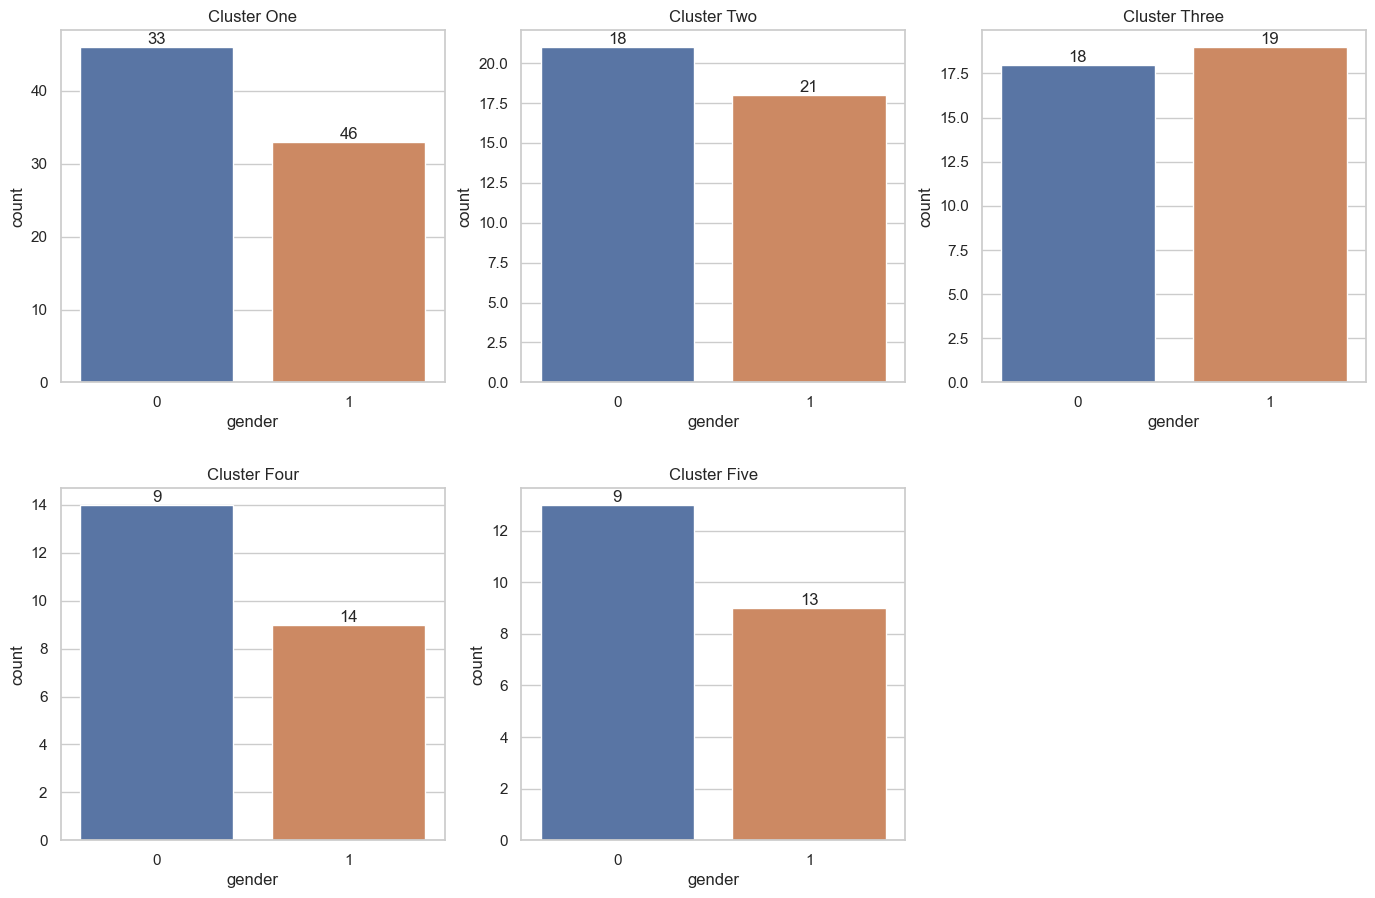

In [53]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
ax = sns.countplot(x = 'gender', data = oneData)
ax.bar_label(container = ax.containers[0],labels = oneData['gender'].value_counts(ascending = True))
plt.title('Cluster One')

plt.subplot(2,3,2)
ax = sns.countplot(x = 'gender', data = twoData)
ax.bar_label(container = ax.containers[0],labels = twoData['gender'].value_counts(ascending = True))
plt.title('Cluster Two')

plt.subplot(2,3,3)
ax = sns.countplot(x = 'gender', data = threeData)
ax.bar_label(container = ax.containers[0],labels = threeData['gender'].value_counts(ascending = True))
plt.title('Cluster Three')

plt.subplot(2,3,4)
ax = sns.countplot(x = 'gender', data = fourData)
ax.bar_label(container = ax.containers[0],labels = fourData['gender'].value_counts(ascending = True))
plt.title('Cluster Four')

plt.subplot(2,3,5)
ax = sns.countplot(x = 'gender', data = fiveData)
ax.bar_label(container = ax.containers[0],labels = fiveData['gender'].value_counts(ascending = True))
plt.title('Cluster Five')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

# Conclusion
Based on the analysis, these are the final observations from the dataset for each cluster:

Cluster 1 occupies the maximum amount of people that earn decent as well as spend a decent amount. They should be sent regular updates and promotional offers so as to keep their interest.

Cluster 2 has high income but they do not shop as much. These people should be targeted since they have the spending capactiy. Their past data should be analysed so as to send them specific promotional messages to get their interest back.

Cluster 3 should be ignored since they do not have the spending capacity nor do they show interest in spending.

Cluster 4 is a risky group since they do not have the spending capacity yet they have a high spending score. They should be sent more discount based coupons.

Cluster 5 is the best group since they have a high income and a high spending score as well. They should be sent regular updates and promotions.